# Decision Trees
Author: Magdalena Whelley

## 1. Overview
Decision Trees are non-linear, rule-based models that recursively split the feature space to classify data into increasingly homogeneous groups. They naturally handle feature interactions, non-linear boundaries, and are easy to interpret visually.

In this notebook, I use the `DecisionTreeClassifier` from `scikit-learn` to classify real data from the Iris dataset. The notebook walks through:
- loading and exploring the dataset
- training and evaluating the decision tree
- visualizing decision boundaries
- comparing performance to expectations

In [2]:
# 2. Setup
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# 3. Load Iris Dataset
data = load_iris()
X = data.data[:, :2]   # sepal length, sepal width
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 105
Testing samples: 45


In [5]:
# 4. Train a Classifier
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Decision Tree Accuracy:", acc)

Decision Tree Accuracy: 0.7555555555555555


In [6]:
# 5. Confusion Matrix & Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

Confusion Matrix:
[[18  1  0]
 [ 0  8  5]
 [ 0  5  8]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      0.95      0.97        19
  versicolor       0.57      0.62      0.59        13
   virginica       0.62      0.62      0.62        13

    accuracy                           0.76        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.77      0.76      0.76        45



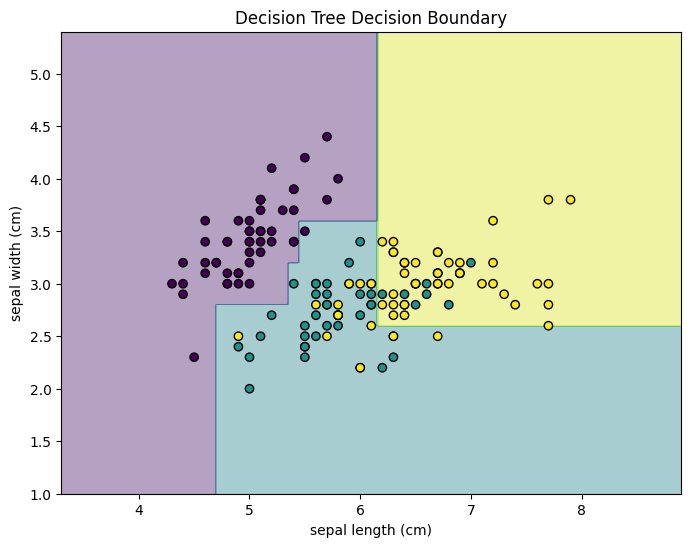

In [7]:
# 6. Decision Boundary Visualization
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]
grid_pred = tree.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, grid_pred, cmap="viridis", alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis", edgecolor="k")
plt.title("Decision Tree Decision Boundary")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

# 7. Conclusion
The decision tree classifier achieved an overall accuracy of 0.756, reflecting reasonable performance given the simplicity of the model and the use of only two features from the Iris dataset. As expected, the model easily separates the setosa class, which is well isolated in feature space; this is confirmed by its perfect precision and near-perfect recall. In contrast, versicolor and virginica exhibit substantial overlap in sepal length and width, leading to lower recall and f1-scores for both classes. The confusion matrix highlights this ambiguity, with several misclassifications occurring specifically between these two species.

The decision boundary visualization reinforces these results. The tree constructs sharp, axis-aligned partitions that fit the structure in the data but remain limited by the non-linear overlap between versicolor and virginica in this 2D projection. Despite these limitations, the model still captures the major separations in the dataset and demonstrates how decision trees adaptively segment feature space using simple, interpretable rules. Using additional features (such as petal length and width) or employing ensemble methods like Random Forests would likely improve classification performance further.